<a href="https://colab.research.google.com/github/supertime1/Floyer_Analysis/blob/main/Cosinuss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Set up dependency

In [1]:
import sys
sys.path.append('C:/Users/57lzhang.US04WW4008/PycharmProjects/cosinuss')

In [2]:
from data_container import config, DataFile
from data_container.api_db_sync import DBSync
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import pickle
import seaborn as sns
from utils import util

2021-03-09 10:50:44 - DEBUG -       dc_config:  45 - DcConfig initialized


#2.Connect to Cosinuss Database

Connect to Cosinuss's database to get the API file handler. **Open redis-server.exe first before running configure_api()** .

In [3]:
# password: teeshau7aiMonoh9ee in case it is needed
api = util.configure_api('sonova_analysis', 'sonova.fremont.api')

2021-03-09 10:50:49 -  INFO -       dc_config: 202 - data_path is "C:\Users\57lzhang.US04WW4008\PycharmProjects\cosinuss\data"
2021-03-09 10:50:49 -  INFO -       dc_config: 118 - connect to database "sonova_analysis"
2021-03-09 10:50:49 -  INFO -       dc_config: 113 - init of data_container successful
2021-03-09 10:50:50 -  INFO -       api_login: 241 - login: sonova.fremont.api @ https://telecovid.earconnect.de
2021-03-09 10:50:50 -  INFO -       api_login: 253 - successful login, it expires 2021-03-09 22:50:52 expiring in 720.0 min


There are 162 files in local database


Generate a table from local local database by filtering the data with date

In [4]:
table = util.generate_table('2020-12-31', api)
print('There are', len(table), 'test records')
table.head()

There are 62 test records


,person,when,device,df id,duration,samples,cols,end
100,M9KH.BZYG (RaHe),2021-02-08 14:15:09,polar,1C2RATHBVH.C4CDEZ,1900-01-01 00:34:48,2.1 K,heart_rate,2021-02-08 14:49:57
101,M9KH.BZYG (RaHe),2021-02-08 14:15:14,cshell,1C2RATHBVH.38CD8K,1900-01-01 00:34:42,1.7 M,"ppg_ir, ppg_ir_2, ppg_ir_3, ppg_...",2021-02-08 14:49:56
102,M9KH.BZYG (RaHe),2021-02-08 14:15:23,cshell,1C2RATHBVH.LEMWKL,1900-01-01 00:34:36,1.7 M,"ppg_ir, ppg_ir_2, ppg_ir_3, ppg_...",2021-02-08 14:49:59
103,M9KH.BZYG (RaHe),2021-02-08 14:15:35,garmin,8QEK89R9B4.NZH5XL,1900-01-01 00:45:27,2.7 K,heart_rate,2021-02-08 15:01:02
104,M9KH.ME9A (LeLo),2021-02-08 15:23:00,polar,1C2RATHBVH.XCMFW1,1900-01-01 00:34:34,2.1 K,heart_rate,2021-02-08 15:57:34


Correct the label of 'cShell' and 'Biometric', in case they were mistakenly entered by Cosinuss

In [ ]:
# slow process, be careful to run it
correct_table = util.correct_label(table, api)

# save the table after running, so that you don't have to clean the label everytime
correct_table.to_pickle("C:/Users/57lzhang.US04WW4008/PycharmProjects/cosinuss/local_db.pkl")

In [5]:
#load table from local directory if you've already done the label cleaning once
correct_table = pd.read_pickle("C:/Users/57lzhang.US04WW4008/PycharmProjects/cosinuss/local_db.pkl")
correct_table.head()

,person,when,device,df id,duration,samples,cols,end
100,M9KH.BZYG (RaHe),2021-02-08 14:15:09,polar,1C2RATHBVH.C4CDEZ,1900-01-01 00:34:48,2.1 K,heart_rate,2021-02-08 14:49:57
101,M9KH.BZYG (RaHe),2021-02-08 14:15:14,cshell,1C2RATHBVH.38CD8K,1900-01-01 00:34:42,1.7 M,"ppg_ir, ppg_ir_2, ppg_ir_3, ppg_...",2021-02-08 14:49:56
102,M9KH.BZYG (RaHe),2021-02-08 14:15:23,biometric,1C2RATHBVH.LEMWKL,1900-01-01 00:34:36,1.7 M,"ppg_ir, ppg_ir_2, ppg_ir_3, ppg_...",2021-02-08 14:49:59
103,M9KH.BZYG (RaHe),2021-02-08 14:15:35,garmin,8QEK89R9B4.NZH5XL,1900-01-01 00:45:27,2.7 K,heart_rate,2021-02-08 15:01:02
104,M9KH.ME9A (LeLo),2021-02-08 15:23:00,polar,1C2RATHBVH.XCMFW1,1900-01-01 00:34:34,2.1 K,heart_rate,2021-02-08 15:57:34


Generate a statistic table for data analysis



In [84]:
# find the row indices of paired floyer-polar device 
paired_idx_lst = util.find_pairs_row_index(correct_table, floyer_device='biometric')
# generate a paired sample class by using the paired row indices; 
# you also need to give the heart rate algorithm version
paired_sample_lst = util.generate_paired_samples(paired_idx_lst, 
                                                 correct_table, 
                                                 'v0',
                                                 api)
# save the paried sample list to save time on next run
with open("C:/Users/57lzhang.US04WW4008/PycharmProjects/cosinuss/paired_sample_biometric.pkl", "wb") as fp:
    pickle.dump(paired_sample_lst, fp)

2021-03-09 11:29:26 -  INFO -     api_db_sync: 429 - Data file 1C2RATHBVH.C4CDEZ completely downloaded + database_entries: Scope, Config, Projects (4), Receivers (3), Persons (27), Devices (4)User (6), 
2021-03-09 11:29:47 -  INFO -     api_db_sync: 429 - Data file 1C2RATHBVH.LEMWKL completely downloaded + database_entries: Scope, Config, Projects (4), Receivers (3), Persons (27), Devices (4)User (6), 
2021-03-09 11:29:50 -  INFO -     api_db_sync: 429 - Data file 1C2RATHBVH.B6WZ94 completely downloaded + database_entries: Scope, Config, Projects (4), Receivers (3), Persons (27), Devices (4)User (6), 
2021-03-09 11:30:08 -  INFO -     api_db_sync: 429 - Data file 1C2RATHBVH.FTZLPT completely downloaded + database_entries: Scope, Config, Projects (4), Receivers (3), Persons (27), Devices (4)User (6), 
2021-03-09 11:30:11 -  INFO -     api_db_sync: 429 - Data file 1C2RATHBVH.B6WZ94 completely downloaded + database_entries: Scope, Config, Projects (4), Receivers (3), Persons (27), Devices

In [85]:
# load the paired_sample_lst if you've done it previously
with open("C:/Users/57lzhang.US04WW4008/PycharmProjects/cosinuss/paired_sample_biometric.pkl", "rb") as fp:
    paired_sample_lst = pickle.load(fp)

In [86]:
# generate a stats_table for stats analysis
stats_table = util.generate_stats_table(paired_sample_lst)
stats_table.head()

,floyer_hr,polar_hr,quality,activity,person
0,0,67,0,Unknown,M9KH.BZYG
1,0,65,24,Unknown,M9KH.BZYG
2,0,65,18,Unknown,M9KH.BZYG
3,0,64,0,Unknown,M9KH.BZYG
4,0,63,5,Unknown,M9KH.BZYG


In [95]:
with open("C:/Users/57lzhang.US04WW4008/PycharmProjects/cosinuss/stats.pkl", "wb") as fp:
    pickle.dump(stats_table, fp)

#3. Data Analysis

In [89]:
mape_df = util.create_mape_table(stats_table, quality_level=35)
mape_df.head()

,mape,da,activity,person
0,12.51,33.0,Chewing (chewing gum),M9KH.3WKY
1,15.25,40.0,Running 6km/h,M9KH.3WKY
2,6.41,48.0,Running 8km/h,M9KH.3WKY
3,4.23,90.0,Sitting,M9KH.3WKY
4,20.66,36.0,Sitting - Standing - Sitting,M9KH.3WKY


In [90]:
def plot_mape(mape_df, num_subject, device_type, algo_version, 
              qf_lvl, person_level=False):
    """
    Make MAPE boxplot
    """
    if not person_level:
        fig, ax = plt.subplots(1, 1, figsize=(15,10))
        ax.set_xticks(np.arange(0,100,10), minor=False)
        ax.grid(b=True, which='major', color='w', linewidth=2.0)
        ax.grid(b=True, which='minor', color='w', linewidth=1)

        sns.set_style('darkgrid')
        g = sns.boxplot(x='mape',
                        y='activity',
                        data=mape_df)
        plt.suptitle('Boxplot of MAPE per Activity', fontsize=20)
        plt.title(f'Num of Subjects = {num_subject},   Device = {device_type},\
   Algo_Version = {algo_version},   QF_lvl = {qf_lvl}', fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.xlabel('MAPE', fontsize=20)
        plt.ylabel('Activity', fontsize=20)

    else:
        g = sns.FacetGrid(mape_df,
                          col='person',
                          col_wrap=1,
                          height=2,
                          aspect=5,
                          hue='activity'
                          )
        g = g.map(plt.bar, 'activity', 'mape')
        axes = g.axes.flatten()
        person_lst = np.unique(mape_df['person'])

        for i in range(len(axes)):
            axes[i].set_title("Person:  " + person_lst[i], fontsize=14)
        g.set_ylabels('MAPE', fontsize=14)
        g.set_xlabels('Activity', fontsize=14)
        plt.xticks(rotation=45, fontsize=14)
        plt.legend(bbox_to_anchor=(1.4, 5))

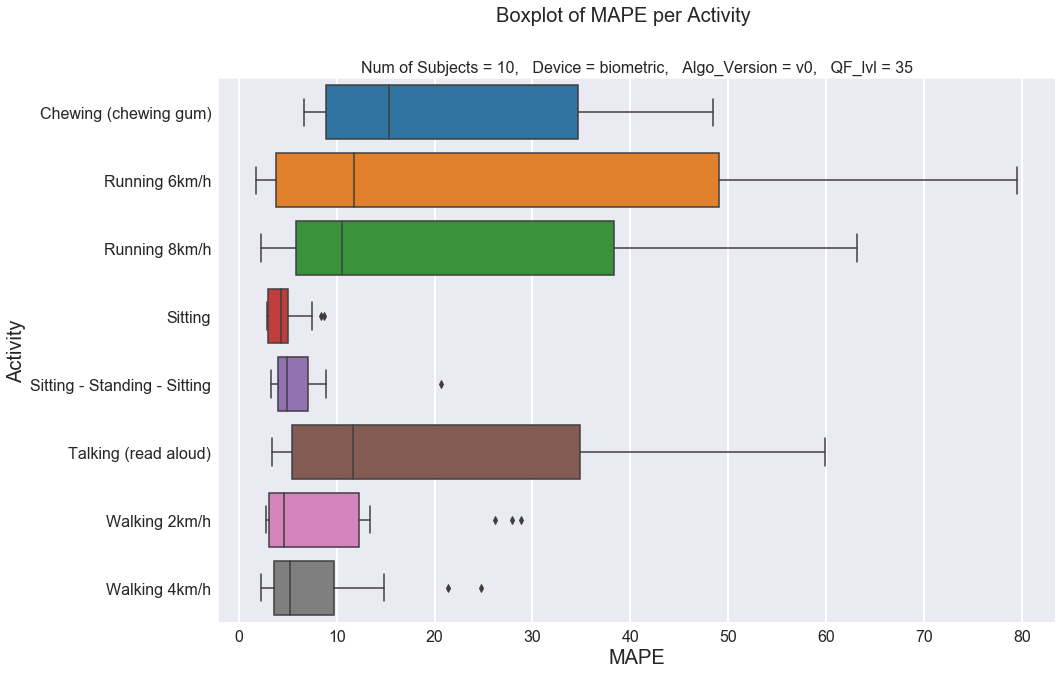

In [92]:
plot_mape(mape_df, '10', 'biometric', 'v0', '35', person_level=False)

In [87]:
def plot_da(mape_df, num_subject, device_type, algo_version, 
              qf_lvl, person_level=False):
    """
    Make MAPE boxplot
    """
    if not person_level:
        fig, ax = plt.subplots(1, 1, figsize=(15,10))
        ax.set_xticks(np.arange(0,100,10), minor=False)
        ax.grid(b=True, which='major', color='w', linewidth=2.0)
        ax.grid(b=True, which='minor', color='w', linewidth=1)
        
        sns.set_style('darkgrid')
        g = sns.boxplot(x='da',
                        y='activity',
                        data=mape_df)
        plt.suptitle('Boxplot of Data Availability per Activity', fontsize=20)
        plt.title(f'Num of Subjects = {num_subject},   Device = {device_type},\
   Algo_Version = {algo_version},   QF_lvl = {qf_lvl}', fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.xlabel('Data Availability', fontsize=20)
        plt.ylabel('Activity', fontsize=20)

    else:
        g = sns.FacetGrid(mape_df,
                          col='person',
                          col_wrap=1,
                          height=2,
                          aspect=5,
                          hue='activity'
                          )
        g = g.map(plt.bar, 'activity', 'da')
        axes = g.axes.flatten()
        person_lst = np.unique(mape_df['person'])

        for i in range(len(axes)):
            axes[i].set_title("Person:  " + person_lst[i], fontsize=14)
        g.set_ylabels('DA', fontsize=14)
        g.set_xlabels('Activity', fontsize=14)
        plt.xticks(rotation=45, fontsize=14)
        plt.legend(bbox_to_anchor=(1.4, 5))
        

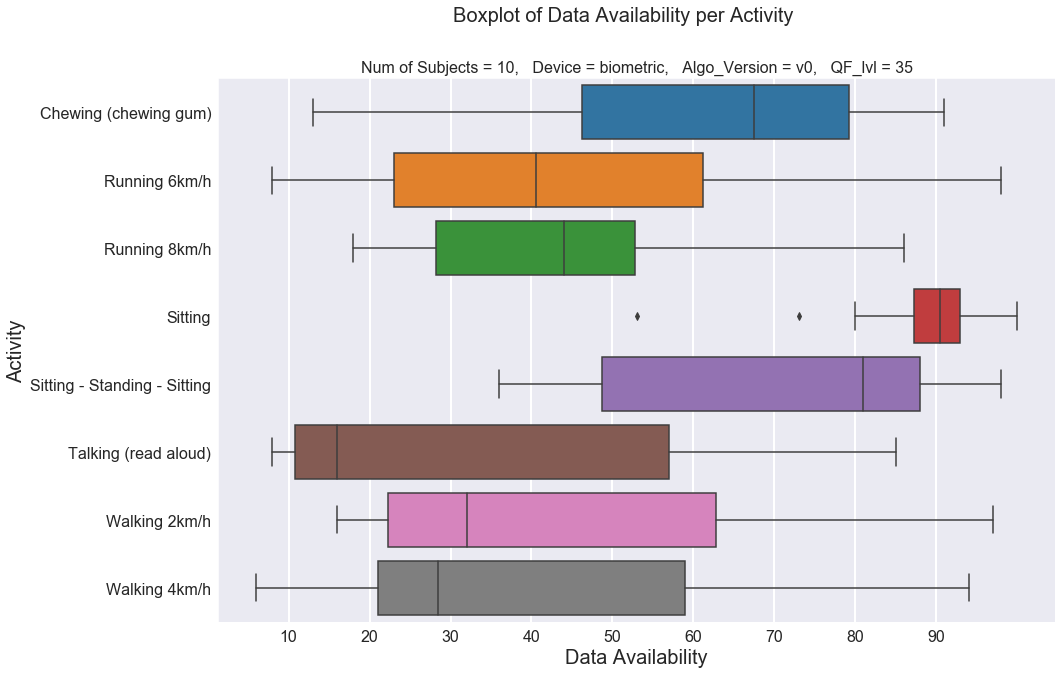

In [93]:
plot_da(mape_df, '10', 'biometric', 'v0', '35', person_level=False)

##Continue Here

In [ ]:
#Make statistic table
def create_overview_table(stats_table, quality_level):
    """
    Create a table with MAPE for each activity
    """
    activity_lst = []
    floyer_mean_lst = []
    floyer_std_lst = []
    polar_mean_lst = []
    polar_std_lst = []
    bias_mean_lst = []
    bias_ci_lst = []
    cor_lst = []
    mape_lst = []
    da_lst = []

    def mean_confidence_interval(data, confidence_level=0.95):
        mean = np.mean(data)
        std = np.std(data)
        t = 

    for activity in np.unique(stats_table['activity']):
        if activity == 'Unknown': continue
        temp_table = stats_table[(stats_table.activity == activity)].reset_index()
        # calculate mape and da
        sum = 0
        count = 0
        for i in range(len(temp_table)):
            if quality_level <= temp_table['quality'][i] <= 100:
                sum += abs(temp_table['floyer_hr'][i] -
                            temp_table['polar_hr'][i]) / temp_table['polar_hr'][i] * 100
                count += 1
        mape = round(sum / count, 2)
        da = round(count / len(temp_table), 2) * 100  
        mape_lst.append(mape)
        da_lst.append(da)
        # calculate mean and std
        floyer_mean_lst.append(temp_table['floyer_hr'].mean())
        polar_mean_lst.append(temp_table['polar_hr'].mean())
        floyer_std_lst.append(temp_table['floyer_hr'].std())
        polar_std_lst.append(temp_table['polar_hr'].std())
        bias_lst.append(np.mean(abs(temp_table['floyer_hr'] - temp_table['polar_hr'])))
        bias_ci_lst.append()
        cor_lst.append()
        
        


        activity_lst.append(activity)

        

    dic = {'mape': mape_lst,
           'da': da_lst,
           'activity': activity_lst,
           'person': person_lst
           }
        
    df = pd.DataFrame(data=dic, index=None)
    return df

mape_df = create_mape_table(stats_table, quality_level=35)
mape_df

Make a DA vs MAPE

In [94]:
stats_table['quality']

0        0
1       24
2       18
3        0
4        5
        ..
2079    94
2080    80
2081    57
2082    62
2083    64
Name: quality, Length: 41326, dtype: int64

In [ ]:
def plot_qa_mape(stats_table):

    mape_lst = []
    da_lst = []
    qa_lst = []
    activity_lst = []

    for activity in np.uqique(stats_table['activity']):
        activity_table = stats_table[stats_table.activity == activity]
        
        qa_range = [35, 40, 45, 50, 55, 60]
        for qa in qa_range:
            sum = 0
            count = 0
            for i in range(len(activity_table)):
                if qa <= activity_table['quality'][i] <= 100:
                    sum += abs(activity_table['floyer_hr'] - 
                               activity_table['polar_hr']) / 
                               activity_table['polar_hr'] * 100
                    count += 1
            mape = round(sum / count, 2)
            da = round(count / len(activity_table), 2)
            mape_lst.append(mape)
            da_lst.append(mape)
            qa_lst.append(qa)
            activity_lst.append(activity)

    dic = {'mape': mape_lst,
           'da': da_lst,
           ''}        
                 

